# Characterization of Discrete Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## The Transfer Function

Different time-domain representations are used to characterize linear time-invariant (LTI) discrete systems. For instance, the constant coefficients of [difference equations](../discrete_systems_time_domain/difference_equation.ipynb) and the [impulse response](../discrete_systems_time_domain/impulse_response.ipynb). The [transfer function](../discrete_systems_time_domain/eigenfunctions.ipynb#Transfer-Function) denotes the complex factor $H(z)$, which an eigenfunction $z^k$ at the input of an LTI system is weighted with, when passing through the system. Since the $z$-transform decomposes discrete signals with respect to these eigenfunctions, the transfer function constitutes a representation of an LTI system in the spectral domain (e.g. discrete (time) Fourier domain). The links between the transfer function and the time-domain representations of LTI systems are discussed in the following.

### Relation to Impulse Response and In-/Output Signal

It was already outlined in the context of the [convolution theorem of the $z$-transform](../z_transform/theorems.ipynb#Convolution-Theorem) and [discrete-time Fourier transform](../discrete_time_fourier_transform/theorems.ipynb#Convolution-Theorem), that an LTI system can be represented equivalently in the temporal and spectral domain. In the temporal domain the output $y[k]$ of a discrete LTI system is given by convolving the input signal $x[k]$ with the [impulse response](../discrete_systems_time_domain/impulse_response.ipynb) $h[k]$ of the system

\begin{equation}
y[k] = x[k] * h[k]
\end{equation}

Applying the convolution theorem of the $z$-transform yields

\begin{equation}
Y(z) = X(z) \cdot H(z)
\end{equation}

where $X(z) = \mathcal{Z} \{ x[k] \}$ and $Y(z) = \mathcal{Z} \{ y[k] \}$ denote the $z$-transforms of the input and output signal, respectively. The transfer function $H(z)$ is given as the $z$-transform of the impulse response $h[k]$

\begin{equation}
H(z) = \mathcal{Z} \{ h[k] \}
\end{equation}

This may also be concluded from the [previously derived link between the impulse response and the transfer function](../discrete_systems_time_domain/eigenfunctions.ipynb#Link-between-Transfer-Function-and-Impulse-Response). The same relation holds in the discrete-time Fourier domain if the region of convergence (ROC) of the signals and impulse response include the unit circle $|z| = 1$ of the $z$-plane

\begin{equation}
Y(e^{j \Omega}) = X(e^{j \Omega}) \cdot H(e^{j \Omega})
\end{equation}

where $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$, $Y(e^{j \Omega}) = \mathcal{F}_* \{ y[k] \}$ and $H(e^{j \Omega}) = \mathcal{F}_* \{ h[k] \}$ denote the discrete-time Fourier transforms (DTFTs) of the input/output signal and impulse response, respectively.

The derived results show that an LTI system can be fully characterized either in the temporal or spectral domain by its impulse response $h[k]$ or transfer function $H(z)$ respectively $H(e^{j \Omega})$.

![LTI system in the temporal and spectral domain](LTI_system_time_spectral_domain.png)

It can furthermore be concluded that the transfer function is given as the quotient between the spectrum of the output $Y(z)$ and input signal $X(z)$

\begin{equation}
H(z) = \frac{Y(z)}{X(z)}
\end{equation}

for $X(z) \neq 0$. Hence, the transfer function may be derived by division of the spectra of the output and input signal.

**Example - Moving Average**

The transfer function $H(z) = \mathcal{Z} \{ h[k] \}$ of the moving average filter is derived from its [impulse response](../discrete_systems_time_domain/impulse_response.ipynb#Finite-Impulse-Response)

\begin{equation}
h[k] = \frac{1}{N} \cdot \text{rect}_N[k]
\end{equation}

using the $z$-transform of the rectangular signal as

\begin{equation}
H(z) =  \begin{cases}
\frac{1}{N} \frac{1 - z^{-N}}{1 - z^{-1}} & \text{for } z \neq 1 \\
1 & \text{for } z = 1
\end{cases}
\end{equation}

for $z \in \mathbb{C} \setminus \{ 0 \}$. Inspection of the transfer function $H(z)$ reveals that is has $N-1$ poles in the origin and $N-1$ zeros from the [roots of unity](https://en.wikipedia.org/wiki/Root_of_unity)

\begin{equation}
z_{0n} = e^{j \frac{2 \pi}{N} n} \quad \text{for } n=1,\dots,N-1
\end{equation}

The zeros are equiangularly distributed on the unit circle $|z| = 1$. Note that there is never a zero at $z=1$ which is a requirement for the here discussed filter characteristics. The transfer function may also be given in the discrete-time Fourier domain as the region of convergence includes the unit circle. Substituting $z$ with $e^{j \Omega}$ in above transfer function yields

\begin{equation}
H(e^{j \Omega}) =  \begin{cases}
\frac{1}{N} \frac{1 - e^{-j \Omega N}}{1 - e^{- j \Omega}} & \text{for } \Omega \neq 0 \\
1 & \text{for } \Omega = 0
\end{cases}
\end{equation}

The absolute value $|H(e^{j \Omega})|$ of the transfer function is plotted below for illustration using $N=5$, thus $N-1$ zeros in the plot can be observed between $0\leq \Omega < 2\pi$.

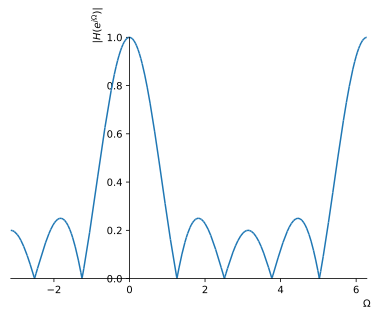

In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

N = 5
W = sym.symbols('Omega', real=True)

H = 1/N * (1 - sym.exp(-sym.I*W*N)) / (1 - sym.exp(-sym.I*W))
sym.plot(sym.Abs(H), (W, -sym.pi, +2*sym.pi),
         xlabel=r'$\Omega$', ylabel=r'$|H(e^{j \Omega})|$')

**Exercises**

* Change the length `N` of the rectangular impulse response. How does the transfer function change?
* What overall character does the transfer function show (low-pass, high-pass, band-pass, band-stop)?
* Regarding the transfer function, can you explain the smoothing property of the [moving average filter](../discrete_systems_time_domain/difference_equation.ipynb#Moving-Average)?

### Relation to Differential Equations

Linear difference equations with constant coefficients quantifying the relation between input $x[k]$ and output $y[k]$ represent an LTI system. In this case a system is characterized by the constants $a_n, b_m \in \mathbb{R}$ of the difference equation

\begin{equation}
\sum_{n = 0}^{N} a_n \; y[k - n] = \sum_{m = 0}^{M} b_m \; x[k -m]
\end{equation}

where $a_0 \neq 0$ and $N$ denoting its degree. Initial values are discarded in the following. Applying a two-sided $z$-transform to the left- and right-hand-side and exploiting the [shift theorem](../z_transform/theorems.ipynb#Shift-Theorem) yields

\begin{equation}
Y(z) \sum_{n=0}^{N} a_n z^{-n} = X(z) \sum_{m=0}^{M} b_m z^{-m}
\end{equation}

Rearranging this result derives the transfer function $H(z)$ of the system as

\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum\limits_{m=0}^{M} b_m z^{-m}}{\sum\limits_{n=0}^{N} a_n z^{-n}}
\end{equation}

The transfer function of an LTI system whose in- and output relation can be characterized by a linear difference equation is given as rational function in $z^{-1}$. The coefficients of its numerator and denominator polynomial are given by the constant coefficients $b_m$ and $a_n$ of the difference equation. The conversion between both representations of an LTI system is therefore straightforward. Note that $H(z)$ is often normalized such that $a_0=1$.

Discrete systems may be classified into [recursive and non-recursive systems](../discrete_systems_time_domain/difference_equation.ipynb#Recursive-and-Non-Recursive-Systems). This has implications on the poles and zeros of the transfer function.

* a so called **non-recursive system** is given if $a_n = 0$ for $n > 0$
* a so called **recursive system** exhibits at least one $a_n \neq 0$ for $n > 0$

A non-recursive system has $M$ poles in the origin of the z-plane and $M$ zeros in the z-plane.
A recursive system has $N$ poles and $M$ zeros in the z-plane.
In order to obtain $a,b\in\mathbb{R}$ the poles/zeros occur either purely real or as complex-conjugated pairs.

**Example - Second-order system**

The transfer function $H(z)$ of the previously introduced [second-order recursive LTI system](difference_equation.ipynb#Second-Order-System) with the difference equation

\begin{equation}
y[k] - y[k-1] + \frac{1}{2} y[k-2] = x[k]
\end{equation}

is computed. The coefficients of the system can be derived from its difference equation as $a_0 = 1$, $a_1 = -1$, $a_2 = \frac{1}{2}$ and $b_0 = 1$. Introducing these into above equation results in

\begin{align}
&Y(z) - Y(z) z^{-1} + \frac{1}{2} Y(z) z^{-2} = X(z)\\ 
&H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1 - z^{-1} + \frac{1}{2} z^{-2}}
\end{align}

The magnitude of the transfer function in the DTFT domain $H(e^{j \Omega}) = H(z) \vert_{z = e^{j \Omega}}$ is plotted for illustration of the system properties

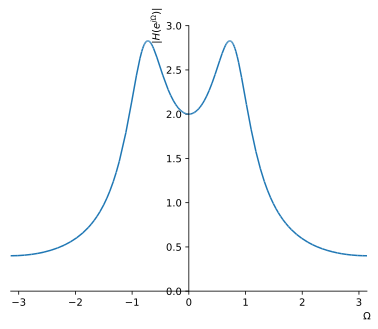

In [2]:
# define variables and transfer function
z = sym.symbols('z', complex=True)
W = sym.symbols('Omega', real=True)
H = 1 / (1 - z**(-1) + sym.Rational(1, 2)*z**(-2))

# plot transfer function
sym.plot(sym.Abs(H.subs(z, sym.exp(sym.I*W))), (W, -sym.pi, sym.pi),
         ylim=(0, 3), xlabel=r'$\Omega$', ylabel=r'$|H(e^{j \Omega})|$')

It becomes evident from inspection of the magnitude response that the system has a low-pass character as higher normalized frequencies $\Omega$ are significantly attenuated. 

It is common to numerically evaluate the transfer function $H(e^{j \Omega})$ of a discrete system at a number of discrete frequencies $\Omega_\mu = e^{j \frac{2 \pi}{N} \mu}$ for $\mu = 0,1,\dots,N-1$ in order to gain insights into its properties. The function [`scipy.signal.freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) computes the transfer function for the given coefficients $a_n$ and $b_m$ numerically. The resulting sampled transfer function is plotted in the following example

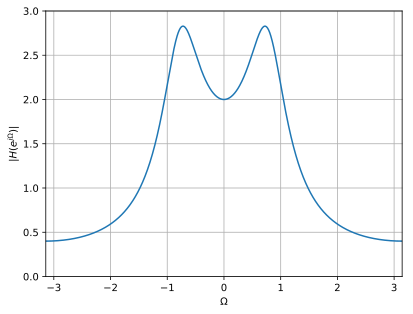

In [3]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

# compute transfer function
a = (1, -1, 1/2)  # convention: a = (a0, a1, a2,...)
b = (1)  # convention: b = (b0, b1, b2,...)
W, H = sig.freqz(b, a, whole=True, worN=np.linspace(-np.pi, np.pi, 2**10))

# plot transfer function
plt.figure()
plt.plot(W, abs(H))
plt.ylabel(r'$|H(e^{j \Omega})|$')
plt.xlabel(r'$\Omega$')
plt.ylim([0, 3])
plt.xlim([-np.pi, np.pi])
plt.grid()

### Determination from Internal Structure

If known, the transfer function $H(z)$ may be determined from the internal structure of a discrete LTI system. The structure of a system is often visualized by a block-diagram or [signal-flow graph](https://en.wikipedia.org/wiki/Signal-flow_graph). For LTI systems these are composed from unit delays $z^{-1}$, multiplications and additions. From the analysis of the system structure, the linear difference equation can be derived. Once its coefficients are known it is straightforward to compute the transfer function $H(z)$. As alternative, the transfer function may also be derived by analysis of the system in the $z$-domain. The transfer function is then given as the quotient between the spectrum of the output signal $Y(z)$ and the input signal $X(z)$.

### Modeling a Continuous System by a Discrete System

It is often desired to model a continuous system by a discrete system showing similar properties. Applications include the characterization of continuous systems and digital realization of their discrete counter parts. For instance, the properties of the discrete counterpart can be investigated more conveniently by numerical methods than the continuous system. 

In the following it is aimed at modeling the continuous system by a discrete LTI system with [finite impulse response](../discrete_systems_time_domain/impulse_response.ipynb#Finite-Impulse-Response) (FIR). The output signal $y(t) = \mathcal{H} \{ x(t) \}$ of the continuous system reads

\begin{equation}
y(t) = x(t) * h(t)
\end{equation}

where $h(t)$ denotes its impulse response. [Ideal sampling](../sampling/ideal.ipynb#Model-of-Ideal-Sampling) of all signals, e.g. $x[k] = x(k T)$ with the sampling interval $T$, yields their discrete-time counterparts

\begin{equation}
y_M[k] = x_L[k] * h_N[k]
\end{equation}

where its is assumed that the signals are of finite length given by the respective index. Due to the properties of the linear convolution for finite-length signals, the length $M$ of the signal $y_M[k]$ is $M = L+N-1$. In order to represent this relation in the DFT domain, the signals $x_L[k]$ and $h_N[k]$ have to be zero-padded to at least length $M$ in order to yield [equality of the linear and periodic convolution](../discrete_fourier_transform/fast_convolution.ipynb#Equivalence-of-Linear-and-Periodic-Convolution). For instance

\begin{equation}
x_M[k] = \begin{cases} 
x_L[k] & \text{for } 0 \leq k < L \\
0 & \text{for } L \leq k < M
\end{cases}
\end{equation}

Introducing the zero-padded signals, performing a DFT of length M on the left- and right-hand side and exploiting the [convolution theorem](../discrete_fourier_transform/theorems.ipynb#Convolution-Theorem) yields

\begin{equation}
Y_M[\mu] = X_M[\mu] \cdot H_M[\mu]
\end{equation}

where for instance $Y_M[\mu] = \text{DFT}_M \{ y_M[k] \}$. Rearranging this result results in

\begin{equation}
H_M[\mu] = \frac{Y_M[\mu]}{X_M[\mu]}
\end{equation}

which requires for $X_M[\mu] \neq 0$.

The FIR $h_N[k]$ of the discrete system is given by the inverse DFT of the transfer function $H_M[\mu]$ followed by a truncation to $N$ samples. 

Above relation requires the knowledge of the in- and output signal of the continuous system in order to derive its discrete model. Practically, the continuous system may be fed by the input signal $x(t)$ that has been reconstructed from its discrete counterpart $x[k]$ generated digitally. A Dirac impulse $x[k] = \delta[k]$ would be a natural first choice as it fulfills $X[\mu] \neq 0$. However, the resulting continuous signal after reconstruction $x(t) = \text{sinc} \left( \frac{\pi t}{T} \right)$ shows a very high [Crest factor](https://en.wikipedia.org/wiki/Crest_factor). In many applications this is undesirable as the major energy of the signal is concentrated in a very short period of time. This issue can be overcome by using specific measurement signals that fulfill $X[\mu] \neq 0$ while showing a low crest factor. For instance [chirp signals](https://en.wikipedia.org/wiki/Chirp).

The application example in the next section shows how the impulse response of a electroacoustic system can be measured following the outlined theory.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.